In [1]:
from utils import *
from functions import *
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png', 'pdf')
set_matplotlib_formats('png')

%matplotlib inline
%load_ext autoreload
%autoreload 2
today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
todayStr = '20160122'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)

In [2]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
output_notebook()

# Instantiate classes
cortex = Cortex()
trn = TRN()
gr = GRAPH()
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('axes', labelsize = 10)
matplotlib.rc('axes', titlesize = 10)
matplotlib.rc('axes', facecolor = "white")
matplotlib.rc('legend', fontsize = 10)
matplotlib.rc('lines', linewidth=2)

Loading BokehJS ...

In [3]:
c = ipp.Client(profile='cluster')
lview = c.load_balanced_view()
lview.block = True

TimeoutError: Hub connection request timed out

In [4]:
len(c.ids)

8

In [5]:
print(c[:].apply_sync(socket.gethostname))
# for i,cx in enumerate(c):
#     print(cx.apply_sync(socket.gethostname))
#     if (cx.apply_sync(socket.gethostname)) == 'dyn1147-170.insecure.ic.ac.uk':
#         cx.execute("os.chdir('/Users/GP1514/Dropbox/ICL-2014/Code/c-code/cortex/notebooks')")

['dyn1147-170.insecure.ic.ac.uk', 'dyn1147-170.insecure.ic.ac.uk', 'dyn1147-170.insecure.ic.ac.uk', 'dyn1147-170.insecure.ic.ac.uk', 'dyn1147-170.insecure.ic.ac.uk', 'dyn1147-170.insecure.ic.ac.uk', 'dyn1147-170.insecure.ic.ac.uk', 'dyn1147-170.insecure.ic.ac.uk']


In [6]:
# paths = ['/Users/GP1514/Dropbox/ICL-2014/Code/c-code/cortex/notebooks']*8 \
# + ['/Users/guillaume/Projects/github/cortex/notebooks']*8 \
# + ['/home/gp1514/Projects/github/cortex/notebooks']*8
paths = ['/home/gp1514/Projects/github/cortex/notebooks']*8
paths = ['/Users/GP1514/Dropbox/ICL-2014/Code/c-code/cortex/notebooks']*8 

c[:].map(os.chdir, paths)
print(c[:].apply_sync(os.getcwd))

['/Users/GP1514/Dropbox/ICL-2014/Code/c-code/cortex/notebooks', '/Users/GP1514/Dropbox/ICL-2014/Code/c-code/cortex/notebooks', '/Users/GP1514/Dropbox/ICL-2014/Code/c-code/cortex/notebooks', '/Users/GP1514/Dropbox/ICL-2014/Code/c-code/cortex/notebooks', '/Users/GP1514/Dropbox/ICL-2014/Code/c-code/cortex/notebooks', '/Users/GP1514/Dropbox/ICL-2014/Code/c-code/cortex/notebooks', '/Users/GP1514/Dropbox/ICL-2014/Code/c-code/cortex/notebooks', '/Users/GP1514/Dropbox/ICL-2014/Code/c-code/cortex/notebooks']


In [23]:
# %px from utils import *

with c[:].sync_imports():
    from utils import IO, Cortex
    import functions
#     from utils import *
#     from functions import *

ImportError: cannot import name 'IO'

In [20]:
@lview.parallel()
def remoteFn(S):
    cortex = Cortex()
    cortex.runSimulation(N=N, r=r, G=G,S=S*10, d1=d1, d2=d2, d3=d3, before=before, after=after,s=sigma,\
               WII=WII, LTP=LTP, LTD=LTD, model=model)

In [21]:
N = 250
G = 4.8
d1 = 2000
d2 = 2000
d3 = 2000
before = d1+d2
after = d3
# before = 10000
# after = 40000
S = 100
sigma = 60
WII = 500

FACT = 1

ratio = 7
LTD  = 4.7e-6 * FACT * N
LTP = ratio * LTD
r=0.8
model = "gp-izh"

it = 1
binsize=1000
coeff = 1

fig = plt.figure(figsize=(6,2))


ints = []


remoteFn.map(range(2))
# for S in range(0,20,2):
#     h,s, total,s2, SSP = cortex.readPSTH(N,r, G,S*10, it,binsize, d1, d2, d3, before, after, sigma, WII, LTP, LTD, model,coeff,RON='IAF', tau_m = 1)
#     plotPTSH(fig, before, after,binsize, h, s, it, DIRECTORY, S*10, N)
# #     ints.append(total)
#     gr.savePTSH(before, after, h, s, it, DIRECTORY, S*10, N)
#     extension = "_S-%d_N-%d_T-%d" % (S, N, before+after)
#     plt.savefig(DIRECTORY + extension + '_PTSH.pdf')
#     spikes_x, spikes_y, spikes_x_tc, spikes_y_tc,\
#     gamma, correlation, ssp1, stimulation,\
#     p,q,lowsp,vm = cortex.readSimulation(N, r, 0, G, S*10, d1, d2, d3, before, after, WII, LTP, LTD, model, )
#     plt.figure()
#     plt.plot(gamma)
#     plt.savefig(DIRECTORY + 'gammaPTSH-S%d.pdf'%(S*10))

CompositeError: one or more exceptions from call to method: remoteFn
[Engine Exception]NameError: name 'Cortex' is not defined
[Engine Exception]NameError: name 'Cortex' is not defined

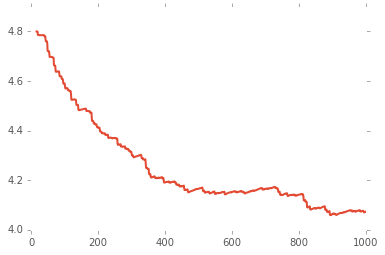

In [9]:
for S in range(0,2,2):
    spikes_x, spikes_y, spikes_x_tc, spikes_y_tc, \
                   gamma, correlation, ssp1, stimulation, p, q, LowSp, vm  = cortex.readSimulation(N, r, 0, G, 10*S, d1, d2, d3, before, after, WII, LTP, LTD, model, )

plt.plot(gamma)